## Download data from Google Drive
#### Install `driveanon` package
The `%%capture` comand hides the printed text.  
You can comment this out to see the output from pip. 

In [1]:
%%capture
!pip install git+https://github.com/friedrichknuth/driveanon.git

In [1]:
import driveanon

#### Check folder content
This is the url to our Google Drive data directory called ASO_LiDAR_TIFs  
https://drive.google.com/drive/folders/18RBI_SmsowSNbZnmtP2S-xWeWEId7-bm?usp=sharing  
Notice the random string of characters that we will call the `folder_blob_id`  

In [23]:
folder_blob_id = '18RBI_SmsowSNbZnmtP2S-xWeWEId7-bm'
file_names, file_blob_ids = driveanon.list_blobs(folder_blob_id,
                                          '.tif',
                                          )

In [28]:
file_names

['ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif',
 'ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif',
 'ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif',
 'ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif']

In [29]:
file_blob_ids

['1Dgy2hOkUPZjbtEDiS6imnHAZg0IFR5Zy',
 '1YnZDpGMpn_dd7XYMoQ4T6PdFR_1TJAV6',
 '1EeGyUG7dSH5AGa6WzFmKGZ6YhkxDmYRP',
 '12jhMafrXHnoD3YLWtQRPWMSIi2an9kEz']

#### Save files to disk
Next let's iterate over the `file_names` list and use driveanon to save the files to disk.

In [26]:
for blob_id in file_blob_ids:
    driveanon.save(blob_id)

#### Let's see what we got.

In [27]:
! ls -al

total 417748
drwxrwsr-x  3 jovyan users      4096 Jul 13 22:34 .
drwxrwsr-x 10 jovyan users      4096 Jul 13 16:53 ..
-rw-r--r--  1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif
-rw-r--r--  1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif
-rw-r--r--  1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif
-rw-r--r--  1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif
drwxr-sr-x  2 jovyan users      4096 Jul 13 21:46 .ipynb_checkpoints
-rw-r--r--  1 jovyan users       249 Jul 13 21:47 notes.txt
-rw-r--r--  1 jovyan users      2454 Jul 13 22:34 pulling_in_data_from_google_drive.ipynb


#### Create data directory and move files there

In [30]:
! mkdir data

In [31]:
! mv ASO*.tif data/

In [1]:
! ls -al data/

total 417736
drwxrwsr-x 2 jovyan users      4096 Jul 13 22:35 .
drwxrwsr-x 4 jovyan users      4096 Jul 14 04:24 ..
-rw-rw-r-- 1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif
-rw-rw-r-- 1 jovyan users 106934192 Jul 13 22:15 ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif
-rw-rw-r-- 1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif
-rw-rw-r-- 1 jovyan users 106941102 Jul 13 22:15 ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif


## Data wrangling

#### Inspect the metadata for the `tif` files

In [35]:
# ! gdalinfo data/ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif
# ! gdalinfo data/ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif
# ! gdalinfo data/ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif
! gdalinfo data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif


Driver: GTiff/GeoTIFF
Files: data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif
Size is 7576, 3528
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 12N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 12N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-111,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1]

#### Looks like these tif files do not have a no data value defined. Let's fix that. (I inspected the data array and see that the nodata value is -9999)

In [2]:
import glob

In [3]:
tif_files = sorted(glob.glob('data/*.tif'))
tif_files

['data/ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif',
 'data/ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif']

In [5]:
for file_name in tif_files:
    ! gdal_edit.py -a_nodata -9999 {file_name}

In [6]:
! gdalinfo data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif

Driver: GTiff/GeoTIFF
Files: data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif
Size is 7576, 3528
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 12N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 12N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-111,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1]

#### That's better. The nodata value is now defined (see end of output above). We want to define this so that software like `rasterio` automatically knows which values to mask out when plotting.

## Plotting

In [4]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

#### Read one of the raster files

In [5]:
tif_files

['data/ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif',
 'data/ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif']

In [6]:
src = rasterio.open(tif_files[0],masked=True)
# src = rasterio.open(tif_files[1],masked=True)
# src = rasterio.open(tif_files[2],masked=True)
# src = rasterio.open(tif_files[3],masked=True)

#### Check min and max value
We want to know the min and max values in the raster array so that we can set the colorbar limits accordingly.   
I am importing a custom function from my `tools.py` file in my directory.   
The autoreload commands enable making changes to `tools.py` which will be automatically loaded into the running notebook, without restarting the notebook.   

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import tools

In [9]:
# read in data array
array = src.read(1)
# replace nodata value with nan
array = tools.replace_and_fill_nodata_value(array, src.nodata, np.nan)


In [10]:
print('min elevation:', np.nanmin(array))
print('max elevation:', np.nanmax(array))

min elevation: 2684.06
max elevation: 3303.0378


#### Plot with `show` command and modify with `matplotlib`
See list of matplotlib colormaps here https://matplotlib.org/stable/tutorials/colors/colormaps.html  

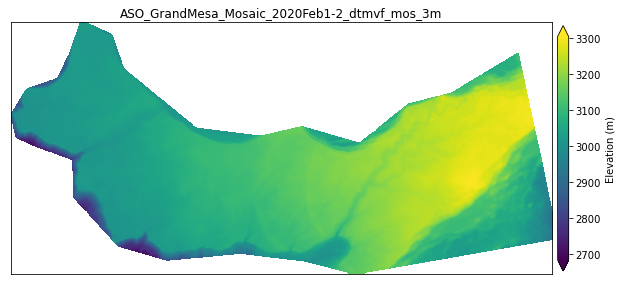

In [11]:
cmap = 'viridis'
vmin = np.nanmin(array)
vmax = np.nanmax(array)

fig,ax = plt.subplots(figsize=(10,5))

show(src, 
     ax=ax,
     cmap=cmap,
     vmin = vmin,
     vmax = vmax)

sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=plt.Normalize(vmin = vmin, 
                                                  vmax = vmax))
cbar = fig.colorbar(sm, 
                    ax=ax,
                    pad=0.01,
                    extend='both',
                    fraction=0.02)

cbar.set_label(label='Elevation (m)')

ax.set_xticks(())
ax.set_yticks(())

title = tif_files[0].split('/')[-1].split('.')[0]
ax.set_title(title);

## Add basemap
Use `contextily`

In [12]:
import contextily as ctx

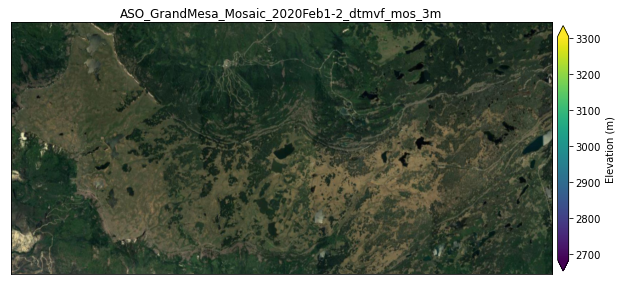

In [13]:
fig,ax = plt.subplots(figsize=(10,5))

show(src, 
     ax=ax,
     cmap=cmap,
     vmin = vmin,
     vmax = vmax,
     alpha=0)

sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=plt.Normalize(vmin = vmin, 
                                                  vmax = vmax))
cbar = fig.colorbar(sm, 
                    ax=ax,
                    pad=0.01,
                    extend='both',
                    fraction=0.02)

cbar.set_label(label='Elevation (m)')

ax.set_xticks(())
ax.set_yticks(())

title = tif_files[0].split('/')[-1].split('.')[0]
ax.set_title(title)

ctx.add_basemap(ax, 
                crs = src.crs,
                zorder=-1,
                source = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}")

## Make interactive map

In [14]:
import xarray as xr
import geoviews as gv
import hvplot
import hvplot.xarray

import warnings
warnings.filterwarnings('ignore')

In [15]:
da = xr.open_rasterio(src)
da.values = tools.replace_and_fill_nodata_value(da.values, src.nodata, np.nan)

In [16]:
img = da.sel(band=1).hvplot.image(rasterize=True,
                                  cmap='viridis',
                                  geo=True)

In [17]:
url   = 'https://mt1.google.com/vt/lyrs=s&x={X}&y={Y}&z={Z}'
tiles = gv.WMTS(url)

In [18]:
img * tiles

:DynamicMap   []
   :Overlay
      .Image.I :Image   [x,y]   (value)
      .WMTS.I  :WMTS   [Longitude,Latitude]

## Difference with snow free DEM
Use `rioxarray`

In [19]:
import rioxarray

In [20]:
tif_files

['data/ASO_GrandMesa_Mosaic_2020Feb1-2_dtmvf_mos_3m.tif',
 'data/ASO_GrandMesa_Mosaic_2020Feb1-2_fsrdemvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_dtmvf_mos_3m.tif',
 'data/ASO_snowfree_GrandMesa_2016Sep26_fsrdemvf_mos_3m.tif']

In [21]:
snow_on = xr.open_dataarray(tif_files[0],engine='rasterio')
snow_off = xr.open_dataarray(tif_files[2],engine='rasterio')

In [22]:
snow_on_match = snow_on.rio.reproject_match(snow_off)
snow_on_match = snow_on_match.assign_coords({
    "x": snow_off.x,
    "y": snow_off.y,
})

In [23]:
snow_on_match.values.shape == snow_off.values.shape

True

In [24]:
difference_array = snow_on_match.values - snow_off.values

In [32]:
difference_da = xr.full_like(da, 1)
difference_da.values = difference_array

In [39]:
img = difference_da.sel(band=1).hvplot.image(rasterize=True,
                                             cmap='Blues',
                                             geo=True,
                                             clim=(0,1))

In [41]:
img * tiles

:DynamicMap   []
   :Overlay
      .Image.I :Image   [x,y]   (value)
      .WMTS.I  :WMTS   [Longitude,Latitude]